In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import numpy as np

from src.data_generator import DataGeneratorOutliers
from src.utils import schedule
from main import bo_with_outliers

### Evaluation of the percentile

In [32]:
max_t = 50
init_t = 5
every_t = 2

alphas = [.01, 0.1, .3, 0.5, .9, .99]
all_errors = np.zeros((len(alphas), max_t))

for i, percentile in enumerate(alphas):
    gen_1d = DataGeneratorOutliers("forrester", prob_outlier=.1, seed=0)
    scheduler = schedule(max_t, init_t, every_t)
    errors, _, _ = bo_with_outliers(gen_1d, scheduler, p=3, percentile=percentile, debug=False)
    all_errors[i, :] = errors[1:]


Iteration 000: schedule=False | Error = 1.6487
Iteration 001: schedule=False | Error = 1.4864
Iteration 002: schedule=False | Error = 1.4864
Iteration 003: schedule=False | Error = 1.4277
Iteration 004: schedule=False | Error = 1.4277
Iteration 005: schedule=False | Error = 1.4277
Iteration 006: schedule=True | Error = 1.4277
Iteration 007: schedule=False | Error = 1.4277
Iteration 008: schedule=True | Error = 1.4277
Iteration 009: schedule=False | Error = 1.4277
Iteration 010: schedule=True | Error = 1.4260
Iteration 011: schedule=False | Error = 1.4260
Iteration 012: schedule=True | Error = 1.4260
Iteration 013: schedule=False | Error = 1.4260
Iteration 014: schedule=True | Error = 1.1372
Iteration 015: schedule=False | Error = 1.1372
Iteration 016: schedule=True | Error = 1.1372
Iteration 017: schedule=False | Error = 1.1372
Iteration 018: schedule=True | Error = 1.1372
Iteration 019: schedule=False | Error = 0.9604
Iteration 020: schedule=True | Error = 0.9604
Iteration 021: schedu

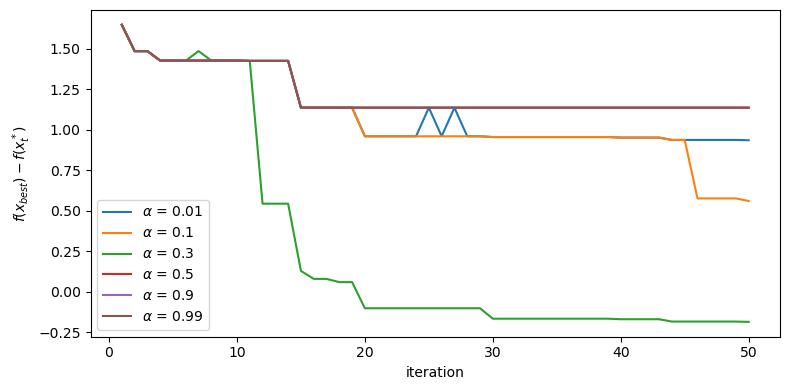

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
for i, percentile in enumerate(alphas):
    ax.plot(np.arange(1, len(errors)), all_errors[i, :], label=rf"$\alpha$ = {percentile}")
ax.set_xlabel("iteration")
ax.set_ylabel(r"$f(x_{best}) - f(x^*_t)$")
ax.legend()
fig.tight_layout()
fig.savefig('alpha.png', dpi=300)

### Evaluation of the 

In [37]:
max_t = 50
init_t = 5
every_t = 2

prob_outliers = [.01, 0.1, .3]
all_errors = np.zeros((len(alphas), max_t))

for i, prob_out in enumerate(prob_outliers):
    gen_1d = DataGeneratorOutliers("forrester", prob_outlier=prob_out, seed=0)
    scheduler = schedule(max_t, init_t, every_t)
    errors, _, _ = bo_with_outliers(gen_1d, scheduler, p=3, percentile=.3, debug=False)
    all_errors[i, :] = errors[1:]


Iteration 000: schedule=False | Error = 1.6487
Iteration 001: schedule=False | Error = 1.4864
Iteration 002: schedule=False | Error = 1.4864
Iteration 003: schedule=False | Error = 1.4277
Iteration 004: schedule=False | Error = 1.1459
Iteration 005: schedule=False | Error = 0.5203
Iteration 006: schedule=True | Error = 0.3976
Iteration 007: schedule=False | Error = -0.0752
Iteration 008: schedule=True | Error = -0.0752
Iteration 009: schedule=False | Error = -0.0752
Iteration 010: schedule=True | Error = -0.0752
Iteration 011: schedule=False | Error = -0.0752
Iteration 012: schedule=True | Error = -0.0714
Iteration 013: schedule=False | Error = -0.0752
Iteration 014: schedule=True | Error = -0.0752
Iteration 015: schedule=False | Error = -0.3603
Iteration 016: schedule=True | Error = 0.0496
Iteration 017: schedule=False | Error = -0.3603
Iteration 018: schedule=True | Error = -0.0752
Iteration 019: schedule=False | Error = -0.3603
Iteration 020: schedule=True | Error = -0.0752
Iteratio

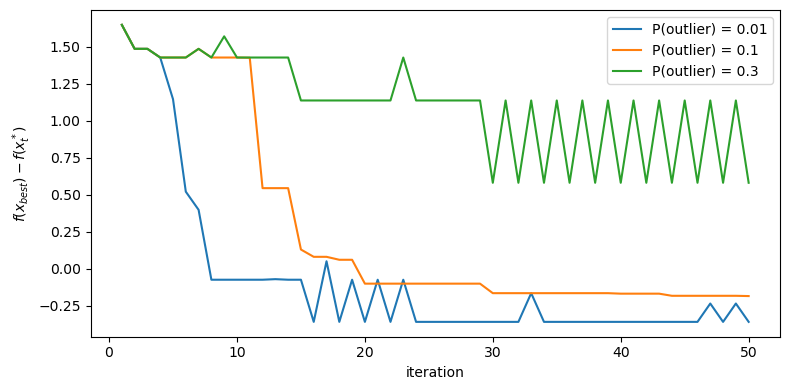

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
for i, prob_out in enumerate(prob_outliers):
    ax.plot(np.arange(1, len(errors)), all_errors[i, :], label=rf"P(outlier) = {prob_out}")
ax.set_xlabel("iteration")
ax.set_ylabel(r"$f(x_{best}) - f(x^*_t)$")
ax.legend()
fig.tight_layout()
fig.savefig('prob_out.png', dpi=300)